In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [30]:
df_us = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")]
df_plot = df_us["job_location"].value_counts().head(10).to_frame()


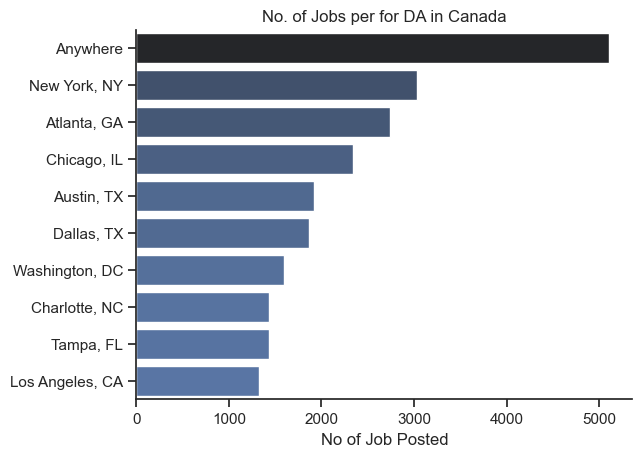

In [ ]:
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
plt.title("No. of Jobs per for DA in US")
sns.despine() #removes border around the graph
plt.ylabel("")
plt.xlabel("No of Job Posted")
plt.show()

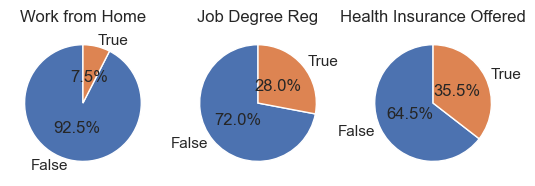

In [31]:
fig, ax = plt.subplots(1, 3)

dict_column = {
  "job_work_from_home": "Work from Home",
  "job_no_degree_mention" : "Job Degree Reg",
  "job_health_insurance": "Health Insurance Offered"
}

for i, (key, value) in enumerate(dict_column.items()):
    ax[i].pie(df_us[key].value_counts(), autopct="%1.1f%%", startangle=90, pctdistance=0.45, labels=["False", "True"])
    ax[i].set_title(value)

plt.show()

In [32]:
df_plot = df_us["company_name"].value_counts().head(10).to_frame()
df_plot

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


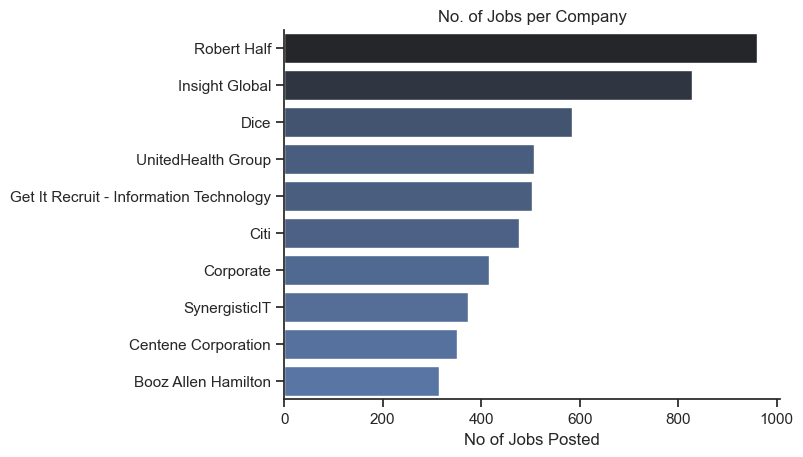

In [33]:
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
plt.title("No. of Jobs per Company")
sns.despine() #removes border around the graph
plt.ylabel("")
plt.xlabel("No of Jobs Posted")
plt.show()